<a href="https://colab.research.google.com/github/Snafkin547/Quantum-ML/blob/main/QML_Ch4_Bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install numpy scipy matplotlib ipython pandas sympy nose seaborn
!pip install scikit-learn
!pip install pylatexenc ipywidgets qutip
!pip install kaggle

In [2]:
from google.colab import drive
import os

#Google Drive mounting to Google Colab
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/QML/Kaggle"
#Change the working directory
%cd /content/gdrive/My Drive/QML/Kaggle/

#Check if the directory was properly changed
%pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/QML/Kaggle


'/content/gdrive/My Drive/QML/Kaggle'

In [9]:
import pandas as pd

train=pd.read_csv('train.csv')

In [12]:
#Prob of survival

survivors=train[train['Survived']==1]
prob_survival=len(survivors)/len(train)

print('P(Survival is {:.2f}'.format(prob_survival))


P(Survival is 0.38


In [22]:
#Prof for second class to survive

secondclass=train[train['Pclass']==2]

prob_survival_secondclass=len(secondclass[secondclass['Survived']==1])/len(secondclass)

print('P(Survival|SecondClass) is {:.2f}'.format(prob_survival_secondclass))

P(Survival|SecondClass) is 0.47


In [23]:
#Prof of female survivors

females=train[train['Sex']=="female"]

prob_survival_females=len(females[females['Survived']==1])/len(females)

print('P(Survival|females) is {:.2f}'.format(prob_survival_females))

P(Survival|females) is 0.74


In [24]:
#Prof of female survivors in second class

secondclass_females=secondclass[secondclass['Sex']=="female"]

prob_survival_secondclass_females=len(secondclass_females[secondclass_females['Survived']==1])/len(secondclass_females)

print('P(Survival|secondclass,females) is {:.2f}'.format(prob_survival_secondclass_females))

P(Survival|secondclass,females) is 0.92


### Beyesian approach

In [29]:
#Survivors in second class
p_surv_sec=len(survivors[survivors['Pclass']==2])/len(survivors)

#Second Class ratio
m_sec=p_surv_sec/(len(secondclass)/len(train))

#Female survivor Ratio
p_surv_female=len(survivors[survivors['Sex']=="female"])/len(survivors)

m_female=p_surv_female/(len(females)/len(train))

posterior=m_sec*m_female*prob_survival

print('\nP(Survived|SecondClass,Female) is {:.2f}'.format(posterior))


P(Survived|SecondClass,Female) is 0.91


### Gaussian Naive Bayes

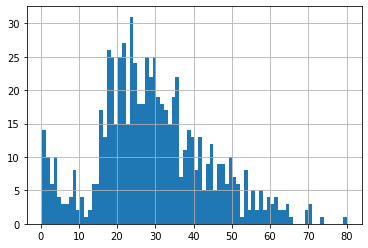

In [40]:
train['Age'].hist(bins=80)

In [43]:
age_mean=train['Age'].mean()

age_std=train['Age'].std()

print('Mean is {:.1f}, Std is {:.1f}'.format(age_mean, age_std))

Mean is 29.7, Std is 14.5


In [44]:
from math import exp, pi, sqrt

def density(mu, sigma, age):
  return 1/(sigma*sqrt(2*pi))*exp(-0.5*((age-mu)/sigma)**2)

survivor_age_mean=survivors["Age"].mean()
survivor_age_std=survivors["Age"].std()

p_surv_age29=density(survivor_age_mean, survivor_age_std, 29)
p_age29=density(age_mean, age_std, 29)
m_age29=p_surv_age29/p_age29
i_age29=abs(m_age29-1)

posterior=m_age29*prob_survival

print('\nP(Survived|age29) is {:.2f}'.format(posterior))


P(Survived|age29) is 0.37
